Universidade Tecnológica Federal do Paraná, Câmpus Campo Mourão - UTFPR-CM

Departamento Acadêmico de Computação - DACOM

BCC6003 - Inteligência Computacional

Prof. Dr. Juliano Henrique Foleis

# Atividade Prática - Árvores de Decisão

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from utils import explicar_mconf

# Pandas é uma biblioteca para manipulação de dados em formato de planilha.
import pandas as pd

# Importar a árvore de decisão do módulo tree do sklearn
from sklearn.tree import DecisionTreeClassifier

# Experimento KNN

In [15]:
# Carregar a base de dados usando pandas
df = pd.read_csv("heart_disease.csv")
# Remover os espaços em branco do começo e do final dos nomes das colunas
df.columns = [i.strip() for i in df.columns]
# Mostrar um resumo da base de dados
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [ ]:
# IMPLEMENTE AQUI A CODIFICAÇÃO DAS CARACTERÍSTICAS CATEGÓRICAS USANDO ONE-HOT ENCODING (Exercício 3)






In [17]:
# X são as características: todas as colunas exceto "Disease"
X = df.drop("Disease", axis=1).values
# y são os rótulos: apenas a coluna "Disease"
y = df["Disease"].values

In [21]:
# Particionando a base de dados em conjuntos de treinamento e testes
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify=y, test_size=0.2, random_state=99)

# Particionando o conjunto de treinamento em treinamento e validação
X_treino, X_val, y_treino, y_val = train_test_split(X_treino, y_treino, stratify=y_treino, test_size=0.2, random_state=100)

In [32]:
#ALTERE ESTA CÉLULA PARA IMPLEMENTAR O EXERCÍCIO 4: REALIZAR A OTIMIZAÇÃO DE HIPERPARÂMETROS USANDO UM CONJUNTO DE VALIDAÇÃO

ad = DecisionTreeClassifier()
ad.fit(X_treino, y_treino)
pred = ad.predict(X_teste)

acuracia = accuracy_score(y_teste, pred)
print("A acurácia no conjunto de testes: %.2f" % acuracia)

A acurácia no conjunto de testes: 0.69


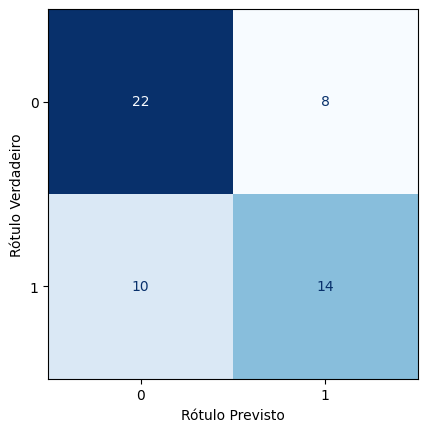

In [30]:
# Mostrar a matriz de confusão.
# A matriz de confusão é um dispositivo para avaliar quais os erros que o modelo cometeu.
# A diagonal principal mostra o número de acertos por classe. Todos os elementos fora da diagonal principal representam erros.
ConfusionMatrixDisplay.from_predictions(y_teste, pred, colorbar=False, cmap="Blues")
plt.xlabel("Rótulo Previsto")
plt.ylabel("Rótulo Verdadeiro")
plt.show()

In [31]:
# Mostrar os erros cometidos pelo classificador. 
# Na prática imprime a interpretação da matriz de confusão acima.
print(explicar_mconf(y_teste, pred))

8 exemplos da classe 0 foram classificados como classe 1
10 exemplos da classe 1 foram classificados como classe 0
36/54 exemplos foram classificados corretamente (acurácia: 66.67%)



In [ ]:
# EXERCÍCIO 5D: Treinando e avaliando um classificador sem a otimização de hiperparâmetros

ad = DecisionTreeClassifier()
ad.fit(X_treino, y_treino)
pred = ad.predict(X_teste)

acuracia = accuracy_score(y_teste, pred)
print("A acurácia no conjunto de testes: %.2f" % acuracia)